FINDER on real datasets
---------------------------------
---------------------------------

In this notebook, we will see hot to apply 'FINDER' to a real dataset.

In [2]:
import os

# Path to the data folder
data_folder = os.path.join(os.getcwd(),"data_sources")

#name of the specific file we want to fit
neuron_path = os.path.join("NeuronData","dendrite_example_Cell1_GluA2_40I_ROI1_1_MMStack_Pos0.ome_locs_render_driftCorr_filter_render_pix.6fr20_picked2_picked3.txt")



We load the data as numpy array, in which the first dimension should be the number of data-points and the second one the number of features.

In [9]:
import numpy as np

X = np.loadtxt(
    os.path.join(data_folder,neuron_path)
    )
#check the dimensions
X.shape

(2401, 2)

So our data consist of 2401 points, in 2-D.

Let's plot the data to see what they look like. We will use the `plotScatter` function

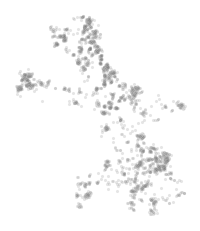

In [11]:
from PlotScatter import plotScatter

plotScatter(labels=None, # we don't have any labelling coming with these data
            XC=X)

### FINDER

In order to use `FINDER` we need to import it first.
Since it uses the `sklearn` API, we simply first define the model with the various parameters.

In [18]:
from Finder import Finder

model = Finder(similarity_score_computation="threshold",
               algo='DbscanLoop')


and then we call the function `fit()` to fit our data.

In [14]:
labels_finder = model.fit(X)

Analysing 2401 points
Boundaries for sigma    : 0.23674224380112738 , 1.2467140249471864
Sigmas are:
[0.23674224 0.26656973 0.30015523 0.33797221 0.38055381 0.42850032
 0.48248768 0.54327698 0.61172521 0.68879733 0.77557988 0.87329628
 0.98332412 1.10721451 1.24671402]
Thresholds are:
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Progress: |██████████████████████████████████████████████████| 100.0% Complete Complete
Computing clusters : 8.95 seconds
Postprocessing..
Progress: |██████████████████████████████████████████████████| 100.0% Complete0.0% Complete
Computing similarity scores: 11.81 seconds
Selected threshold , sigma : 9 , 0.543276978754237
Comp time Step 1 (set boundaries): 0.04 seconds
Comp time Step 2 (clustering): 8.96 seconds
Comp time Step 3 (postprocessing): 12.48 seconds
Selected parameters: {'sigma': 0.543276978754237, 'threshold': 9}


The parameters selected by the algorithm can be easily accessed

In [15]:
model.selected_parameters

{'sigma': 0.543276978754237, 'threshold': 9}

Let's have a look at the clustering perfomed by FINDER.

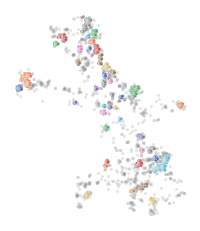

In [16]:
plotScatter(model.labels, #now we you use the labels found by FINDER
            X)

And we can plot the `SimilarityScore` (see the paper) to see how it looks like for the various configurations.

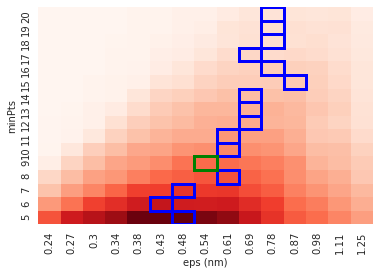

In [17]:
model.plotPhaseSpace()